In [399]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import datetime
from matplotlib.ticker import FormatStrFormatter
from datetime import timedelta

In [219]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [408]:
player_batting = pd.read_csv('../data_aggregated/correa_batting.csv')
player_batting.fillna(method = 'ffill', inplace=True)

In [409]:
dates = pd.read_csv('../csv_from_scrape/baseball_dates_index.csv')

In [410]:
bangs = pd.read_csv('../bangs_file_better_date.csv')

In [411]:
player_bangs = bangs[(bangs['batter'] == 'Carlos Correa') & (bangs['has_bangs'] == 'y')]
len(player_bangs)

97

In [412]:
player_bangs

,Unnamed: 0,game_id,game_pk,game_date,opponent,final_away_runs,final_home_runs,inning,top_bottom,batter,at_bat_event,pitch_type_code,pitch_category,has_bangs,bangs,call_code,description,on_1b,on_2b,on_3b,youtube_id,pitch_youtube_seconds,youtube_url,pitch_datetime,game_pitch_id,event_number,pitch_playid,atbat_playid,away_team_id,home_team_id,DATE
1519,1519,2017_04_28_oakmlb_houmlb_1,490439,28/4/2017,OAK,4,9,8,bottom,Carlos Correa,Double,SI,FB,y,1B,B,Ball,t,f,t,udvxhKisXD0,10561,https://www.youtube.com/watch?v=udvxhKisXD0&t=...,28/4/2017 21:56:10-05:05,170429025611,558,4192a964-ea8a-4e42-8084-5282b3c72fc5,08173abc-410d-4561-9599-d2ef62277a65,133,117,04-28
2339,2339,2017_05_10_atlmlb_houmlb_1,490598,10/5/2017,ATL,2,4,5,bottom,Carlos Correa,Double,CH,CH,y,1B,C,Called Strike,t,t,f,zGZbOV103Y8,6395,https://www.youtube.com/watch?v=zGZbOV103Y8&t=...,10/5/2017 14:46:42-05:05,170510194647,329,7db06c81-3cc9-4e37-845d-638d5fd14bff,25c38d28-816f-4286-8652-9d734d23007f,144,117,05-10
2527,2527,2017_05_19_clemlb_houmlb_1,490721,19/5/2017,CLE,5,3,8,bottom,Carlos Correa,Lineout,SL,BR,y,2B,S,Swinging Strike,f,f,f,7E_Frt13xj8,10581,https://www.youtube.com/watch?v=7E_Frt13xj8&t=...,19/5/2017 21:56:32-05:05,170520025637,556,0b4b762e-d762-44bf-bd8a-abdcada9e6c4,de07c3dc-20ac-4cdd-ab30-d25cbea9e26b,114,117,05-19
2683,2683,2017_05_22_detmlb_houmlb_1,490766,22/5/2017,DET,0,1,1,bottom,Carlos Correa,Groundout,FT,FB,y,1B,C,Called Strike,f,t,f,agAm8myQGq8,1570,https://www.youtube.com/watch?v=agAm8myQGq8&t=...,22/5/2017 19:26:21-05:05,170523002626,53,d964bc13-aace-415f-af92-30f976892991,fdfc9dc4-805b-4918-a5e6-1f24f38fa7f5,116,117,05-22
3078,3078,2017_05_28_balmlb_houmlb_1,490846,28/5/2017,BAL,4,8,2,bottom,Carlos Correa,Single,FC,FB,y,2B,C,Called Strike,f,f,f,oM0yZ4bcJ4Y,2749,https://www.youtube.com/watch?v=oM0yZ4bcJ4Y&t=...,28/5/2017 13:45:56-05:05,170528184601,126,ea25e55c-23d1-4e85-a961-e70b415d8a2f,5bf57511-d28f-4c0f-b772-9063bea445ff,110,117,05-28
3079,3079,2017_05_28_balmlb_houmlb_1,490846,28/5/2017,BAL,4,8,2,bottom,Carlos Correa,Single,CU,BR,y,1B,B,Ball,f,f,f,oM0yZ4bcJ4Y,2764,https://www.youtube.com/watch?v=oM0yZ4bcJ4Y&t=...,28/5/2017 13:46:11-05:05,170528184617,127,0b5ae1ee-4b7a-4428-b3a6-b460b902670e,5bf57511-d28f-4c0f-b772-9063bea445ff,110,117,05-28
3080,3080,2017_05_28_balmlb_houmlb_1,490846,28/5/2017,BAL,4,8,2,bottom,Carlos Correa,Single,FC,FB,y,1B,D,"In play, no out",f,f,f,oM0yZ4bcJ4Y,2788,https://www.youtube.com/watch?v=oM0yZ4bcJ4Y&t=...,28/5/2017 13:46:35-05:05,170528184642,128,5bf57511-d28f-4c0f-b772-9063bea445ff,5bf57511-d28f-4c0f-b772-9063bea445ff,110,117,05-28
3114,3114,2017_05_28_balmlb_houmlb_1,490846,28/5/2017,BAL,4,8,2,bottom,Carlos Correa,Groundout,FC,FB,y,1B,C,Called Strike,t,f,f,oM0yZ4bcJ4Y,4137,https://www.youtube.com/watch?v=oM0yZ4bcJ4Y&t=...,28/5/2017 14:09:04-05:05,170528190909,211,e5fca0ac-b006-41d0-9648-1bd4102bcaf0,4804c66a-d945-4cf2-9113-d5c352608e3a,110,117,05-28
3115,3115,2017_05_28_balmlb_houmlb_1,490846,28/5/2017,BAL,4,8,2,bottom,Carlos Correa,Groundout,CH,CH,y,2B,B,Ball,t,f,f,oM0yZ4bcJ4Y,4160,https://www.youtube.com/watch?v=oM0yZ4bcJ4Y&t=...,28/5/2017 14:09:27-05:05,170528190932,212,c752394f-85f8-4fa5-a42b-1041e93c0418,4804c66a-d945-4cf2-9113-d5c352608e3a,110,117,05-28
3116,3116,2017_05_28_balmlb_houmlb_1,490846,28/5/2017,BAL,4,8,2,bottom,Carlos Correa,Groundout,FC,FB,y,1B,B,Ball,t,f,f,oM0yZ4bcJ4Y,4187,https://www.youtube.com/watch?v=oM0yZ4bcJ4Y&t=...,28/5/2017 14:09:54-05:05,170528190959,213,8afef897-6870-405f-96ca-dcdc7e1985af,4804c66a-d945-4cf2-9113-d5c352608e3a,110,117,05-28


In [413]:
player_batting.head()

,DATE,2015 Batting Averages,2016 Batting Averages,2017 Batting Averages
0,03-30,NaN,NaN,NaN
1,03-31,NaN,NaN,NaN
2,04-01,NaN,NaN,NaN
3,04-02,NaN,NaN,NaN
4,04-03,NaN,NaN,0.5


In [414]:
better_dates = pd.to_datetime(player_batting['DATE'], format='%m-%d')
player_batting = player_batting.drop('DATE', axis = 1)
player_batting.insert(loc=0, column='DATE', value=better_dates)

In [415]:
player_batting

,DATE,2015 Batting Averages,2016 Batting Averages,2017 Batting Averages
0,1900-03-30,NaN,NaN,NaN
1,1900-03-31,NaN,NaN,NaN
2,1900-04-01,NaN,NaN,NaN
3,1900-04-02,NaN,NaN,NaN
4,1900-04-03,NaN,NaN,0.500
5,1900-04-04,NaN,NaN,0.250
6,1900-04-05,NaN,0.250,0.300
7,1900-04-06,NaN,0.556,0.231
8,1900-04-07,NaN,0.385,0.235
9,1900-04-08,NaN,0.412,0.200


In [416]:
better_dates_bangs = pd.to_datetime(player_bangs['DATE'], format='%m-%d')

In [417]:
player_bangs.insert(loc=0, column='Better Date', value=better_dates_bangs)

In [418]:
len(player_bangs)

97

In [419]:
player_batting['DATE'][0]

Timestamp('1900-03-30 00:00:00')

## Plotting Layout

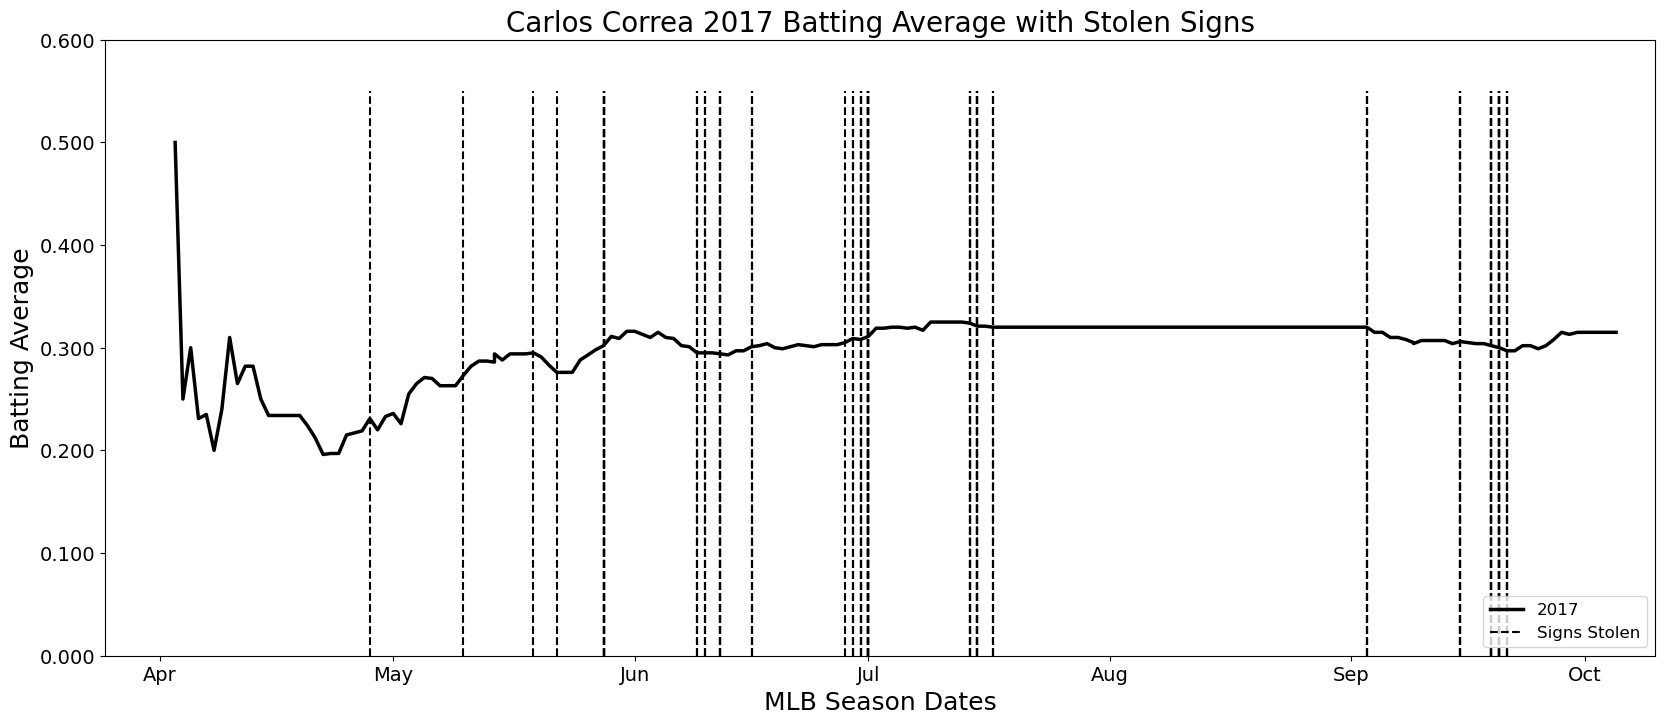

In [425]:
fig, ax = plt.subplots(figsize = (20, 8))

# ax.plot(player_batting['DATE'], player_batting['2011 Batting Averages'], label = '2011')
# ax.plot(player_batting['DATE'], player_batting['2012 Batting Averages'], label = '2012')
# ax.plot(player_batting['DATE'], player_batting['2013 Batting Averages'], label = '2013')
# ax.plot(player_batting['DATE'], player_batting['2014 Batting Averages'], label = '2014')
# ax.plot(player_batting['DATE'], player_batting['2015 Batting Averages'], label = '2015')
# ax.plot(player_batting['DATE'], player_batting['2016 Batting Averages'], label = '2016')
ax.plot(player_batting['DATE'], player_batting['2017 Batting Averages'], label = '2017', color='black',  linewidth = 2.5)

ax.vlines(player_bangs['Better Date'], ymin = 0, ymax = 0.550, ls='--', label = 'Signs Stolen')

#fuck around with getting xticks to be the months only
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)

# format the axes
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

d = timedelta(days = 5)
start_date = min(player_batting['DATE']) - d
end_date = max(player_batting['DATE']) + d

plt.xlim(start_date, end_date)
plt.ylim(0, .6)

player = 'Carlos Correa'

ax.legend(loc = 'lower right', fontsize = 12)
# plt.title(player + " Career Batting Averages", fontsize = 20)
# plt.title(player + " Career Batting Averages with Stolen Signs", fontsize = 20)
plt.title(player + " 2017 Batting Average with Stolen Signs", fontsize = 20)
plt.xlabel("MLB Season Dates", fontsize = 18)
plt.ylabel('Batting Average', fontsize = 18)

# plt.savefig('../plots_and_images/correa_2017_batting_averages.png')
plt.show()